# 머신러닝(Machine Learning)

## 선형 회귀(Linear Regression) - 보스턴 집값 예측 예제

### 1. 데이터 전처리(data pre-processing)

In [1]:
# 구글 드라이브와 Colab 연결
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
# pandas 사용을 위한 라이브러리 불러오기
import pandas as pd

# 데이터 불러오기 - boston.csv
path = # csv 파일의 경로를 적어주세요
data = pd.read_csv(path)

In [3]:
# 앞의 5개 데이터 살펴보기
data.head() # tip - () 안에 들어가는 수 만큼 데이터를 보여줍니다. default=5

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,b,lstat,medv
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2


In [4]:
# 행, 열(row, column) 확인
data.shape

(506, 14)

In [5]:
# 결측치 확인
data.isnull().sum()  # isnull(): Nan 또는 Null으로 표시된 데이터가 존재하는지 확인합니다. 결측치가 존재할 시 1, 존재하지 않을 시 0을 반환합니다.

crim       0
zn         0
indus      0
chas       0
nox        0
rm         0
age        0
dis        0
rad        0
tax        0
ptratio    0
b          0
lstat      0
medv       0
dtype: int64

 - 독립변수(입력값)와 종속변수(출력값)을 분리해봅시다.

In [6]:
# 보스턴 "집값" 예측 데이터이므로, 집값이 종속변수가 될 것입니다.
# 집값을 제외한 나머지를 변수 X에 넣어줍시다.
X = data.drop(['medv'], axis=1)
X.head()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,b,lstat
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33


In [7]:
# 종속변수인 집값에 대한 정보는 Y에 넣어줍시다.
Y = data['medv']
Y.head()

0    24.0
1    21.6
2    34.7
3    33.4
4    36.2
Name: medv, dtype: float64

In [8]:
# 학습 데이터가 훈련 데이터(train data)와 검증 데이터(test data)로 나누어져 있지 않습니다.
# 데이터를 나누어주는 라이브러리를 불러와 나누어줍시다.
from sklearn.model_selection import train_test_split

# train data와 test data를 8:2로 나누어 줍시다. 일반적으로 9:1, 8:2, 7:3이 많이 사용됩니다.
# 학습에 사용되는 데이터가 많을수록 예측 성능은 올라갑니다.
xtrain, xtest, ytrain, ytest = train_test_split(X, Y, test_size = 0.2, random_state = 0)

print('xtrain: ', xtrain.shape)
print('xtest: ', xtest.shape)
print('ytrain: ', ytrain.shape)
print('ytest: ', ytest.shape)

xtrain:  (404, 13)
xtest:  (102, 13)
ytrain:  (404,)
ytest:  (102,)


### 2. 모델 불러오기 및 예측

In [9]:
# 데이터가 준비되었으니 이제 모델을 학습시킵시다.
# 학습에 앞서, 우리가 사용할 모델을 불러오겠습니다.
from sklearn.linear_model import LinearRegression

# 모델을 지정
model = LinearRegression()

# 모델을 학습
model.fit(xtrain, ytrain)

# 테스트 결과 예측
y_pred = model.predict(xtest)

In [20]:
# 생각보다 간단하게 모델의 학습과 예측이 종료되었습니다.
# 그럼, 오차를 계산해주는 라이브러리를 불러 예측한 데이터가 실제 데이터와 얼마나 차이가 나는지 확인해봅시다.
from sklearn.metrics import mean_squared_error, mean_absolute_error

MSE = mean_squared_error(ytest, y_pred)
MAE = mean_absolute_error(ytest, y_pred)
print(f"평균 제곱 오차: {MSE:.3f}")
print(f"평균 절대 오차: {MAE:.3f}")

평균 제곱 오차: 35.657
평균 절대 오차: 3.913


- 우리는 데이터를 불러오고 결측치가 없는지만 확인했습니다. 데이터를 더 살펴보면 오차를 줄일 수 있지 않을까요?

### 3. 데이터의 중요성 - 데이터의 시각화와 전처리

In [132]:
# 다시, 처음으로 돌아가봅시다.
# 모든 데이터가 정말 모델이 예측하는데 도움이 될까요?
# 이를 확인할 수 있는 상관관계분석을 소개드리겠습니다.
# 상관관계분석은 각각의 변수들이 서로 얼마나 관계가 있는지 알려주는 지표입니다.
# 이를 이용해 데이터를 한번 분석해봅시다.

In [12]:
# 상관관계 계산
correlation = data.corr()

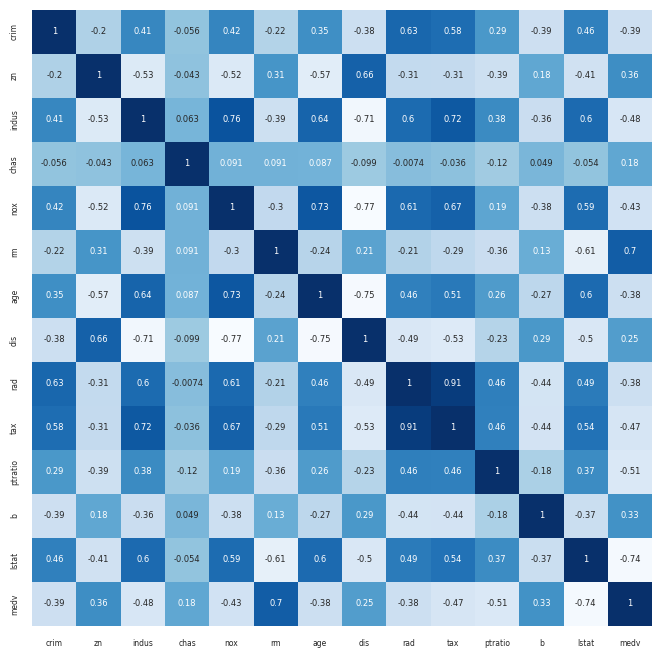

In [13]:
# 상관관계 시각화를 위한 라이브러리 불러오기
import matplotlib.pyplot as plt
import seaborn as sns

# 상관관계를 시각화 (히트맵 표시) - 히트맵(heatmap)은 열(columns)을 뜻하는 heat와 지도를 뜻하는 map의 합성어로, 열 간의 관계를 나타내는 지도라고 이해하시면 좋습니다.
plt.figure(figsize=(8,8))
sns.set(font_scale=0.5)
sns.heatmap(correlation, annot=True, cbar=False, cmap='Blues')
plt.show()

- 집값(medv)과의 관련 정도만 추출하여 확인해봅시다.

In [135]:
# abs(): 절댓값으로 상관계수를 전부 양수로 변경
# sort_values(): 내림차순으로 정렬
price_corr = correlation.loc[:'lstat', 'medv'].abs().sort_values(ascending=False)
price_corr

lstat      0.737663
rm         0.695360
ptratio    0.507787
indus      0.483725
tax        0.468536
nox        0.427321
crim       0.388305
rad        0.381626
age        0.376955
zn         0.360445
b          0.333461
dis        0.249929
chas       0.175260
Name: medv, dtype: float64

In [21]:
# 위의 결과로 모든 데이터가 집값과 크게 관련이 있지 않는 것을 확인할 수 있네요.
# 종속변수와 관련성이 0.4 이상인 특징만 사용하여 예측을 하면 성능이 올라가지 않을까요?
# 위 과정을 중요한 특징을 찾아내는 "특징 선택(feature selection)" 과정이라고 부릅니다.
# 여기서는 13개의 독립변수를 사용하지만, 실제 세상에서는 더 많은 특징이 존재할 것이고, 이는 결국 계산 비용(cost)을 늘립니다.
# feature selection은 이런 문제를 해결해줄 수 있습니다.

# 독립변수 X를 재정의
processed_X = data.loc[:, ['lstat', 'rm', 'ptratio', 'indus', 'tax', 'nox']]
processed_X.head()

,lstat,rm,ptratio,indus,tax,nox
0,4.98,6.575,15.3,2.31,296,0.538
1,9.14,6.421,17.8,7.07,242,0.469
2,4.03,7.185,17.8,7.07,242,0.469
3,2.94,6.998,18.7,2.18,222,0.458
4,5.33,7.147,18.7,2.18,222,0.458


In [22]:
# 데이터를 다시 분리
p_xtrain, p_xtest, ytrain, ytest = train_test_split(processed_X, Y, test_size = 0.2, random_state = 0)

print('xtrain: ', p_xtrain.shape)
print('xtest: ', p_xtest.shape)
print('ytrain: ', ytrain.shape)
print('ytest: ', ytest.shape)

xtrain:  (404, 6)
xtest:  (102, 6)
ytrain:  (404,)
ytest:  (102,)


In [23]:
# 다시 한번 학습을 진행해봅시다.

# 모델을 지정
model = LinearRegression()

# 모델을 학습
model.fit(p_xtrain, ytrain)

# 테스트 결과 예측
y_pred = model.predict(p_xtest)

In [24]:
MSE = mean_squared_error(ytest, y_pred)
MAE = mean_absolute_error(ytest, y_pred)
print(f"평균 제곱 오차: {MSE:.3f}")
print(f"평균 절대 오차: {MAE:.3f}")

평균 제곱 오차: 42.652
평균 절대 오차: 4.395


- 우리가 예상한 것과 반대로 오차가 증가했습니다! 우리가 필요없다고 판단한 특징이 사실은 모델의 예측에 큰 역할을 하고 있었나봅니다.
- 이렇듯, 단순히 상관계수만 확인하고 특징을 선택하는 것은 성능의 하락을 불러올 수 있습니다.
- 따라서 특징 선택은 다른 확률적 방식을 사용하여 예측값과의 관계를 확인하고, 다양한 특징 선택 방법론을 사용하는 것이 좋습니다.
- 특징 선택을 하는 방법에 대해서는 **노션**을 참고해주세요.
- 마지막으로 실제 값과 예측 값을 시각화하여 비교하는 것으로 마무리하겠습니다. 이번주도 고생하셨습니다!

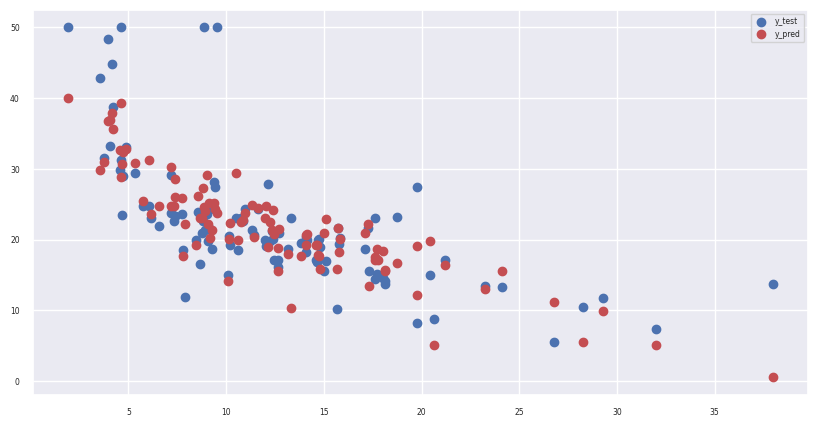

In [167]:
#예측값과 실제값의 분포
plt.figure(figsize=(10, 5)) #표 크기 지정
plt.scatter(p_xtest['lstat'], ytest, label='y_test')  #파란점, 실제값
plt.scatter(p_xtest['lstat'], y_pred, c='r', label='y_pred')  #빨간점, 예측값
plt.legend(loc='best')  #범례(오른쪽 상단 박스)가 표시되는 위치 지정
plt.show()